<a href="https://colab.research.google.com/github/F1k0o/portfolio/blob/main/skolniProjekty/datovaAnalytika/DA_semestralka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/london_merged.csv')

In [ ]:
df['t1_intervals'] = pd.cut(df['t1'],
                            bins = [-2, 0,  6, 12, 18, 24, 34],
                            labels = ['(-1,5 ; 0]', '(0 ; 6]', '(6 ; 12]','(12 ; 18]','(18 ; 24]','(24 ; 34]' ])
df['t2_intervals'] = pd.cut(df['t2'],
                            bins = [-7, 0,  6, 12, 18, 24, 34],
                            labels = ['(-1,5 ; 0]', '(0 ; 6]', '(6 ; 12]','(12 ; 18]','(18 ; 24]','(24 ; 34]' ])
df['wind_intervals'] = pd.cut(df['wind_speed'],
                              bins=[-1, 10, 20, 30, 40, 50, 60],
                              labels=['(0 ; 10]', '(10 ; 20]', '(20 ; 30]', '(30 ; 40]', '(40 ; 50]', '(50 ; 60]'])

df['hum_intervals'] = pd.cut(df['hum'], bins=[0, 20, 40, 60, 80, 100] ,
                             labels=['0-20', '21-40', '41-60', '61-80', '81-100'] ,
                             right=True)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t1_intervals,t2_intervals,wind_intervals,hum_intervals
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,(0 ; 6],(0 ; 6],(0 ; 10],81-100
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,(0 ; 6],(0 ; 6],(0 ; 10],81-100
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,(0 ; 6],(0 ; 6],(0 ; 10],81-100
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,(0 ; 6],(0 ; 6],(0 ; 10],81-100
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,(0 ; 6],"(-1,5 ; 0]",(0 ; 10],81-100


In [ ]:
correlation = df['cnt'].corr(df['t1'])
print(correlation)


0.38879845125473067


In [ ]:
df['is_workday'] = ((df['is_weekend'] == 0) & (df['is_holiday'] == 0)).astype(int)

#1. část vizualizace alespoň 5 atributů

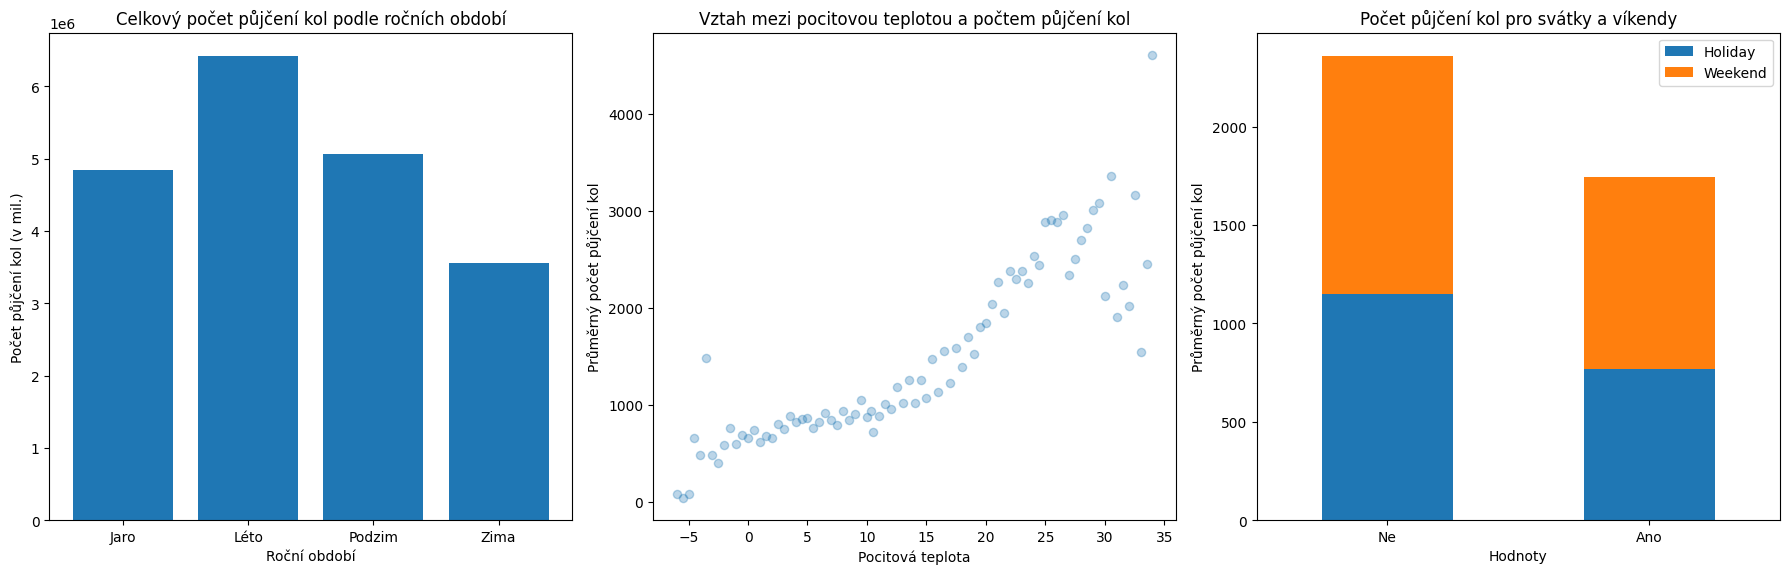

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# První graf - bar plot
season_counts = df.groupby('season')['cnt'].sum()
season_labels = ['Jaro', 'Léto', 'Podzim', 'Zima']
axes[0].bar(season_labels, season_counts)
axes[0].set_xlabel('Roční období')
axes[0].set_ylabel('Počet půjčení kol (v mil.)')
axes[0].set_title('Celkový počet půjčení kol podle ročních období')

# Druhý graf - scatter plot (Vztah mezi pocitovou teplotou a průměrným počtem půjčení kol)
humidity_avg = df.groupby('t2')['cnt'].mean()
axes[1].scatter(humidity_avg.index, humidity_avg.values, alpha=0.3, s=35)
axes[1].set_xlabel('Pocitová teplota')
axes[1].set_ylabel('Průměrný počet půjčení kol')
axes[1].set_title('Vztah mezi pocitovou teplotou a počtem půjčení kol')

# Počítání průměrného počtu pro oba atributy (is_holiday a is_weekend)
holiday_avg = df.groupby('is_holiday')['cnt'].mean()
weekend_avg = df.groupby('is_weekend')['cnt'].mean()

# Spojení obou hodnot do jedné struktury pro stackování
avg_df = pd.DataFrame({
    'Holiday': holiday_avg,
    'Weekend': weekend_avg
}).fillna(0)

# Třetí graf - stackovaný bar plot
avg_df.plot(kind='bar', stacked=True, ax=axes[2])

axes[2].set_xlabel('Hodnoty')
axes[2].set_ylabel('Průměrný počet půjčení kol')
axes[2].set_title('Počet půjčení kol pro svátky a víkendy')
axes[2].set_xticklabels(['Ne', 'Ano'], rotation=0)

plt.tight_layout()
plt.show()

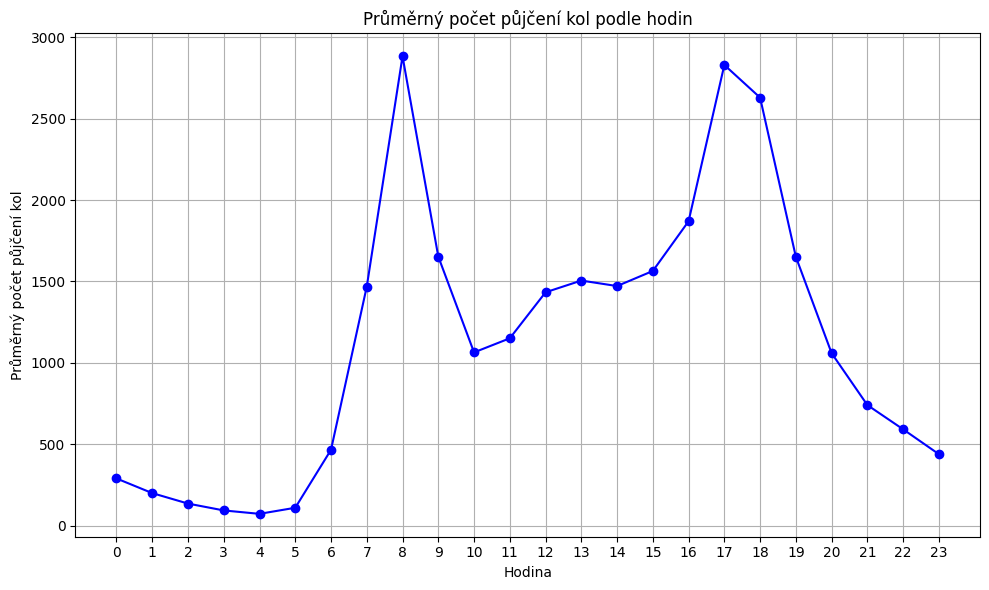

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Převod timestamp na datetime, pokud není
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vytvoření sloupce pro hodinu
df['hour'] = df['timestamp'].dt.hour
df['year'] = df['timestamp'].dt.year

# Vypočítání průměrného počtu půjčení kol podle hodin
avg_bikes_per_hour = df.groupby('hour')['cnt'].mean()

# Vykreslení grafu
plt.figure(figsize=(10, 6))
plt.plot(avg_bikes_per_hour.index, avg_bikes_per_hour.values, marker='o', color='b')
plt.xlabel('Hodina')
plt.ylabel('Průměrný počet půjčení kol')
plt.title('Průměrný počet půjčení kol podle hodin')
plt.xticks(range(24))
plt.grid(True)

plt.tight_layout()
plt.show()


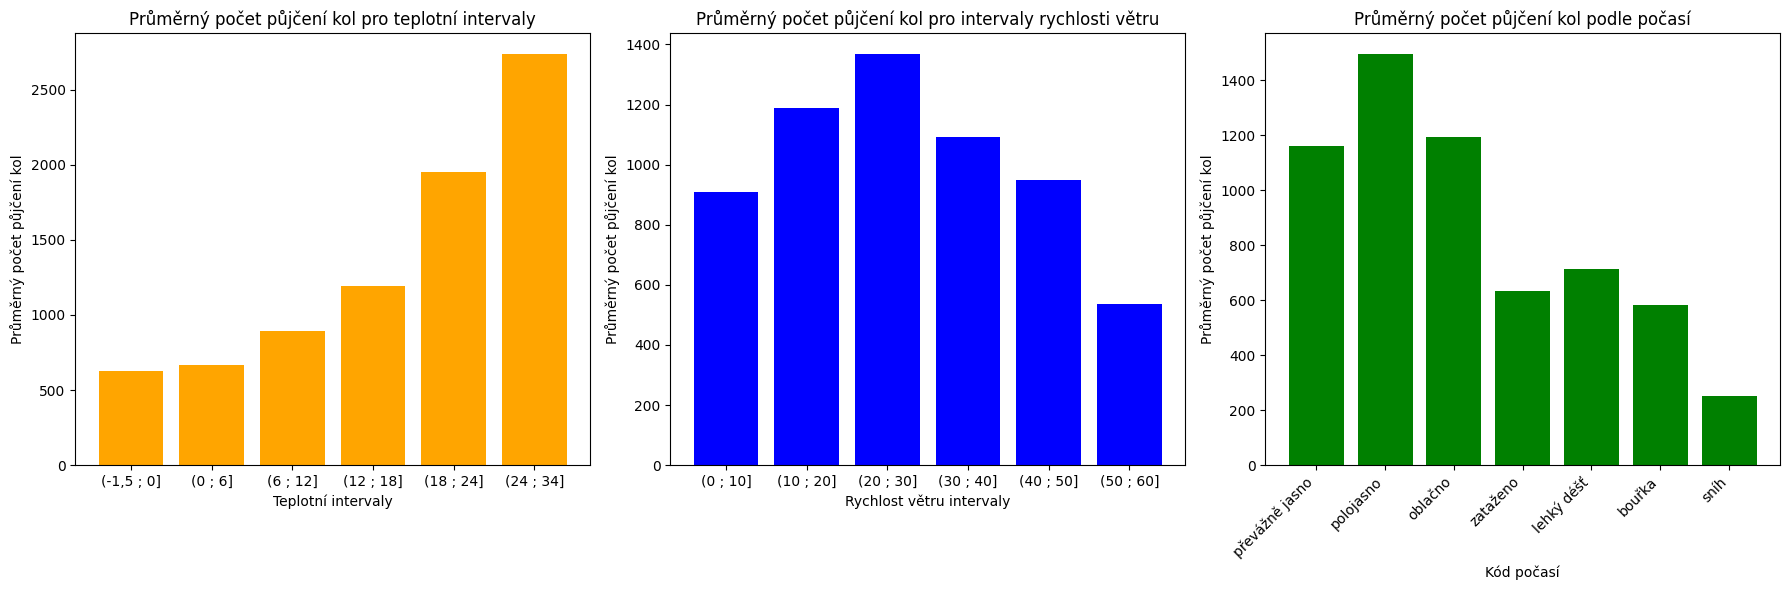

In [ ]:
import matplotlib.pyplot as plt

# Průměr počtu půjčení kol pro t1_intervals, wind_intervals a weather_code
t1_avg = df.groupby('t1_intervals', observed=True)['cnt'].mean().sort_index()
wind_avg = df.groupby('wind_intervals', observed=True)['cnt'].mean().sort_index()
weather_avg = df.groupby('weather_code', observed=True)['cnt'].mean().sort_index()

# Vytvoření subgrafů vedle sebe
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Graf pro t1_intervals (průměr)
ax[0].bar(t1_avg.index, t1_avg.values, color='orange')
ax[0].set_xlabel('Teplotní intervaly')
ax[0].set_ylabel('Průměrný počet půjčení kol')
ax[0].set_title('Průměrný počet půjčení kol pro teplotní intervaly')

# Graf pro wind_intervals (průměr)
ax[1].bar(wind_avg.index, wind_avg.values, color='blue')
ax[1].set_xlabel('Rychlost větru intervaly')
ax[1].set_ylabel('Průměrný počet půjčení kol')
ax[1].set_title('Průměrný počet půjčení kol pro intervaly rychlosti větru')

# Graf pro weather_code (průměr)
weather_labels = {
    1: 'převážně jasno',
    2: 'polojasno',
    3: 'oblačno',
    4: 'zataženo',
    7: 'lehký déšť',
    10: 'bouřka',
    26: 'sníh',
    94: 'mrazící mlha'
}

# Převeďte kódy počasí na popisky
weather_avg.index = weather_avg.index.map(weather_labels)

# Vytvoření grafu pro weather_code
ax[2].bar(weather_avg.index, weather_avg.values, color='green')
ax[2].set_xlabel('Kód počasí')
ax[2].set_ylabel('Průměrný počet půjčení kol')
ax[2].set_title('Průměrný počet půjčení kol podle počasí')

# Správné nastavení popisků na ose X
ax[2].set_xticks(weather_avg.index)  # Nastavení pozic na X osu
ax[2].set_xticklabels(weather_avg.index, rotation=45, ha='right')  # Popisky s rotací

# Uspořádání a zobrazení grafů
plt.tight_layout()
plt.show()


# 2. část - vytvoření alespoň 3 agregovaných údajů

In [ ]:
# Součet počtu půjčených kol podle roku
yearly_sum = df.groupby('year')['cnt'].sum()

# Výpis výsledku
print(yearly_sum)


year
2015     9738746
2016    10129546
2017       37680
Name: cnt, dtype: int64


In [ ]:
from tabulate import tabulate

# Vypočítání průměrného počtu půjčených kol pro svátky
avg_h = df.groupby('is_holiday')['cnt'].mean()
avg_h = avg_h.rename(index={0.0: 'Ne', 1.0: 'Ano'})

# Vypočítání počtu záznamů pro svátky
count_h = df.groupby('is_holiday')['cnt'].count()
count_h = count_h.rename(index={0.0: 'Ne', 1.0: 'Ano'})

# Příprava dat pro tabulku bez resetování indexu
table_data = list(zip(avg_h.index, avg_h.values, count_h.values))

# Vytvoření tabulky
print('Průměrný počet půjčených kol pro běžné dny a svátky:\n', tabulate(table_data, headers=['Svátek', 'Průměrný počet půjčených kol', 'Počet záznamů'], tablefmt='grid'))


Průměrný počet půjčených kol pro běžné dny a svátky:
 +----------+--------------------------------+-----------------+
| Svátek   |   Průměrný počet půjčených kol |   Počet záznamů |
+==========+================================+=================+
| Ne       |                       1151.53  |           17030 |
+----------+--------------------------------+-----------------+
| Ano      |                        769.526 |             384 |
+----------+--------------------------------+-----------------+


In [ ]:
from tabulate import tabulate

# Vypočítání průměrného počtu půjčených kol pro víkend
avg_w = df.groupby('is_weekend')['cnt'].mean()
avg_w = avg_w.rename(index={0.0: 'Ne', 1.0: 'Ano'})

# Vypočítání počtu záznamů pro víkend
count_w = df.groupby('is_weekend')['cnt'].count()
count_w = count_w.rename(index={0.0: 'Ne', 1.0: 'Ano'})

# Příprava dat pro tabulku bez resetování indexu
table_data = list(zip(avg_w.index, avg_w.values, count_w.values))

# Vytvoření tabulky
table = tabulate(table_data, headers=['Víkend', 'Průměrný počet půjčených kol', 'Počet záznamů'], tablefmt='grid')

print('Průměrný počet půjčených kol pro pracovní dny a víkend:\n', table)


Průměrný počet půjčených kol pro pracovní dny a víkend:
 +----------+--------------------------------+-----------------+
| Víkend   |   Průměrný počet půjčených kol |   Počet záznamů |
+==========+================================+=================+
| Ne       |                       1209.27  |           12444 |
+----------+--------------------------------+-----------------+
| Ano      |                        977.416 |            4970 |
+----------+--------------------------------+-----------------+


In [ ]:
from tabulate import tabulate

# Vypočítání průměrného počtu půjčených kol podle počasí
weather_avg = df.groupby('weather_code')['cnt'].mean()

# Přiřazení názvů počasí
weather_avg.index = weather_avg.index.map(weather_labels)

# Vypočítání počtu záznamů pro každý typ počasí
count_weather = df.groupby('weather_code')['cnt'].count()

# Přiřazení názvů počasí k počtu záznamů
count_weather.index = count_weather.index.map(weather_labels)

# Celkový počet záznamů
total_records = df.shape[0]

# Výpočet procenta záznamů pro každý typ počasí
percentage_weather = (count_weather / total_records) * 100

# Příprava dat pro tabulku
table_data = list(zip(weather_avg.index, weather_avg.values.round(2), count_weather.values, percentage_weather.round(2)))

# Vytvoření tabulky
table = tabulate(table_data, headers=['Počasí', 'Průměrný počet půjčených kol', 'Počet záznamů', 'Procento záznamů'], tablefmt='grid')

print('Průměrný počet kol podle počasí: \n', table)


Průměrný počet kol podle počasí: 
 +----------------+--------------------------------+-----------------+--------------------+
| Počasí         |   Průměrný počet půjčených kol |   Počet záznamů |   Procento záznamů |
+================+================================+=================+====================+
| převážně jasno |                        1162.09 |            6150 |              35.32 |
+----------------+--------------------------------+-----------------+--------------------+
| polojasno      |                        1496.18 |            4034 |              23.17 |
+----------------+--------------------------------+-----------------+--------------------+
| oblačno        |                        1195.12 |            3551 |              20.39 |
+----------------+--------------------------------+-----------------+--------------------+
| zataženo       |                         635.23 |            1464 |               8.41 |
+----------------+--------------------------------+----

#3. Cleverminer

In [ ]:
!pip install cleverminer

vytvoření kategorického sloupce pro poptávku

In [ ]:
# Výpočet kvartilů pro rozdělení na kategorie
nizka = df['cnt'].quantile(0.2)
stredneNizka = df['cnt'].quantile(0.4)
stredni = df['cnt'].quantile(0.6)
stredneVysoka = df['cnt'].quantile(0.8)
vysoka = df['cnt'].max()

# Funkce pro přiřazení kategorie na základě hodnoty 'cnt'
def categorize_demand(x):
    if x <= nizka:
        return 'Nízká poptávka'
    elif x <= stredneNizka:
        return 'Středně nízká poptávka'
    elif x <= stredni:
        return 'Střední poptávka'
    elif x < stredneVysoka:
        return 'Středně vysoká poptávka'
    elif x <= vysoka:
        return 'Vysoká poptávka'

# Aplikace funkce na sloupec 'cnt'
df['demand_category'] = df['cnt'].apply(categorize_demand)

# Výpis nového dataframe
df

print(df['demand_category'].value_counts())
print(nizka, stredneNizka, stredni, stredneVysoka, vysoka)

demand_category
Nízká poptávka             3490
Střední poptávka           3484
Vysoká poptávka            3484
Středně nízká poptávka     3478
Středně vysoká poptávka    3478
Name: count, dtype: int64
170.0 608.0 1119.0 1915.0 7860


##4ft

##1 - v teple vzdy vysoka poptavka

In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro 4ft-Miner
clm_4ft = cleverminer(df=df, proc='4ftMiner',
       quantifiers={'Base': 500, 'conf': 0.9},
       ante={
            'attributes': [
                {'name': 'season', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 4, 'type': 'con'},
       succ={
            'attributes': [
                {'name': 'demand_category', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 1, 'maxlen': 1, 'type': 'con'}
       )

#clm_4ft.print_summary()
clm_4ft.print_rulelist()
#clm_4ft.print_rule(1)


Cleverminer version  1.2.0
Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
Encoding columns into bit-form...
Encoding c

##2 - nizka a vysoka poptavka podle vlhokost vzduchu

In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro 4ft-Miner
clm_4ft = cleverminer(df=df, proc='4ftMiner',
       quantifiers={'Base': 150, 'conf': 0.6},
       ante={
            'attributes': [
                {'name': 'season', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'hum_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 1},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 1},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 5, 'type': 'con'},
       succ={
            'attributes': [
                {'name': 'demand_category', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
            ], 'minlen': 1, 'maxlen': 1, 'type': 'con'}
       )

#clm_4ft.print_summary()
clm_4ft.print_rulelist()
#clm_4ft.print_rule(1)


Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:01
Done. Total verifications : 1724, rules 11, times: prep 0.20sec, processing 1.47sec

List of rules:
RULEID BASE  CONF  AAD    Rule
     1   182 0.641 +2.198 season(0) & hum_intervals(81-100) & weather_code(1) & t1_intervals((0 ; 6] (6 ; 12]) => demand_category(Nízká poptávka) | ---
     2   176 0.638 +2.182 season(0) & hum_intervals(81-100) & weather_code(1) & t1_intervals((0 ; 6] (6 ; 12]) & wind_intervals((0 ; 10] (10 ; 20]) => demand_category(Nízká poptávka) | ---
     3   178 0.614 +2.063 season(0) & hum_intervals(81-100) & weather_code(1) & wind_intervals((0 ; 10] (10 ; 20]) => demand_category(Nízká poptáv

##3 - to same 2xdemand_category

In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro 4ft-Miner
clm_4ft = cleverminer(df=df, proc='4ftMiner',
       quantifiers={'Base': 500, 'conf': 0.8},
       ante={
            'attributes': [
                {'name': 'hum_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 1},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 1},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 5, 'type': 'con'},
       succ={
            'attributes': [
                {'name': 'demand_category', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 1, 'maxlen': 1, 'type': 'con'}
       )

#clm_4ft.print_summary()
clm_4ft.print_rulelist()
#clm_4ft.print_rule(1)


Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 46, rules 3, times: prep 0.17sec, processing 0.12sec

List of rules:
RULEID BASE  CONF  AAD    Rule
     1   626 0.852 +1.130 hum_intervals(41-60) & weather_code(1) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20] (20 ; 30]) => demand_category(Středně vysoká poptávka Vysoká poptávka) | ---
     2   744 0.954 +1.386 hum_intervals(41-60) & weather_code(2) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20] (20 ; 30]) => demand_category(Středně vysoká poptávka Vysoká poptávka) | ---
     3   541 0.801 +1.003 hum_intervals(81-100) & weather_code(1) & t1_intervals

##4 - weather_code(7)


In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro 4ft-Miner
clm_4ft = cleverminer(df=df, proc='4ftMiner',
       quantifiers={'Base': 200, 'conf': 0.4},
       ante={
            'attributes': [
                {'name': 'hum_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 1},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 1},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 4, 'type': 'con'},
       succ={
            'attributes': [
                {'name': 'demand_category', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
            ], 'minlen': 1, 'maxlen': 1, 'type': 'con'}
       )

#clm_4ft.print_summary()
clm_4ft.print_rulelist()
#clm_4ft.print_rule(1)


Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 91, rules 29, times: prep 0.11sec, processing 0.16sec

List of rules:
RULEID BASE  CONF  AAD    Rule
     1   305 0.443 +1.213 hum_intervals(41-60) & weather_code(1) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((0 ; 10] (10 ; 20]) => demand_category(Vysoká poptávka) | ---
     2   241 0.478 +1.390 hum_intervals(41-60) & weather_code(1) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20]) => demand_category(Vysoká poptávka) | ---
     3   376 0.512 +1.557 hum_intervals(41-60) & weather_code(1) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20] (20 ; 30])

##5 - vikendy a svatky

In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro 4ft-Miner

clm_4ft = cleverminer(df=df, proc='4ftMiner',
       quantifiers={'Base': 400, 'conf': 0.9},
       ante={
            'attributes': [
                {'name': 'season', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'is_workday', 'type': 'seq', 'minlen': 1, 'maxlen': 1}
            ], 'minlen': 4, 'maxlen': 4, 'type': 'con'},
       succ={
            'attributes': [
                {'name': 'demand_category', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 1, 'maxlen': 1, 'type': 'con'}
       )

#clm_4ft.print_summary()
clm_4ft.print_rulelist()
#clm_4ft.print_rule(1)


Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 689, rules 5, times: prep 0.13sec, processing 0.31sec

List of rules:
RULEID BASE  CONF  AAD    Rule
     1   421 0.923 +1.309 season(0 1) & weather_code(2) & t1_intervals((18 ; 24]) & is_workday(1) => demand_category(Středně vysoká poptávka Vysoká poptávka) | ---
     2   444 0.927 +1.319 season(0 1) & weather_code(2) & t1_intervals((18 ; 24] (24 ; 34]) & is_workday(1) => demand_category(Středně vysoká poptávka Vysoká poptávka) | ---
     3   418 0.923 +1.308 season(1) & weather_code(2) & t1_intervals((18 ; 24] (24 ; 34]) & is_workday(1) => demand_category(Středně vysoká poptávka Vy

#CF


In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro CFMiner
clm_cf = cleverminer(df=df, target='demand_category', proc='CFMiner',
       quantifiers={'S_UP':3, 'S_DOWN':1, 'Base': 200},
       cond={
            'attributes': [
                {'name': 'season', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 4, 'type': 'con'}
       )


clm_cf.print_rulelist()
clm_cf.print_rule(1)

Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  CFMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 1393, rules 11, times: prep 0.11sec, processing 0.43sec

List of rules:
RULEID BASE  S_UP  S_DOWN Condition
     1   899     3     1 season(0) & weather_code(1) & t1_intervals((6 ; 12] (12 ; 18]) & wind_intervals((10 ; 20] (20 ; 30])
     2   315     3     1 season(0 1) & weather_code(3) & t1_intervals((12 ; 18]) & wind_intervals((10 ; 20])
     3   510     3     1 season(0 1) & weather_code(3) & t1_intervals((12 ; 18]) & wind_intervals((10 ; 20] (20 ; 30])
     4   604     3     1 season(0 1) & weather_code(3 4) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20])
     5  

In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro CFMiner

clm_cf = cleverminer(df=df, target='demand_category', proc='CFMiner',
       quantifiers={'S_UP':4,  'Base': 1000},
       cond={
            'attributes': [
                {'name': 'season', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 3},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 4, 'type': 'con'}
       )


clm_cf.print_rulelist()
clm_cf.print_rule(1)

Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  CFMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 312, rules 3, times: prep 0.14sec, processing 0.29sec

List of rules:
RULEID BASE  S_UP  S_DOWN Condition
     1  1396     4     0 season(0 1) & weather_code(3 4 7) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20] (20 ; 30])
     2  1301     4     0 season(1) & weather_code(2 3 4) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((0 ; 10] (10 ; 20])
     3  1043     4     0 season(1) & weather_code(3 4 7) & t1_intervals((12 ; 18] (18 ; 24]) & wind_intervals((10 ; 20] (20 ; 30])



Rule id : 1

Base :  1396  Relative base : 0.080  Steps UP (consecutive) :     4  Steps 

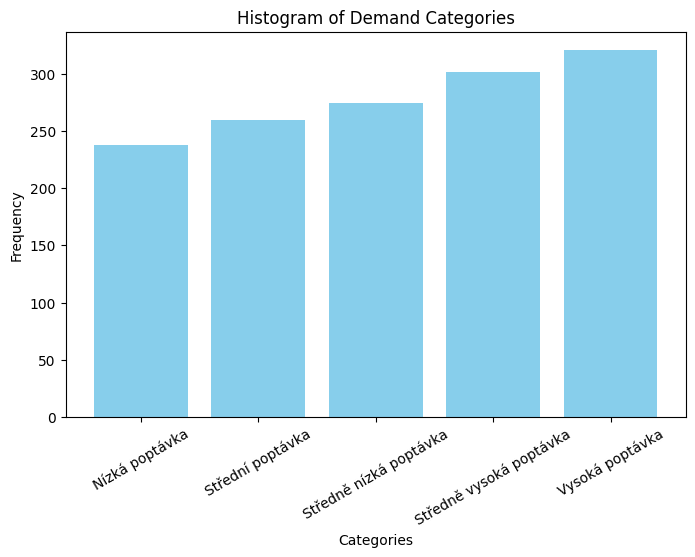

In [ ]:
import matplotlib.pyplot as plt

# Data from the input
categories = ['Nízká poptávka', 'Střední poptávka', 'Středně nízká poptávka', 'Středně vysoká poptávka', 'Vysoká poptávka']
histogram = [238, 260, 275, 302, 321]

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.bar(categories, histogram, color='skyblue')

# Adding title and labels
plt.title('Histogram of Demand Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=30)

# Show the plot
plt.show()


In [ ]:
from cleverminer import cleverminer

# Vytvoření instance pro CFMiner

clm_cf = cleverminer(df=df, target='demand_category', proc='CFMiner',
       quantifiers={'RelMax':0.6,  'Base': 200},
       cond={
            'attributes': [
                {'name': 'season', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'weather_code', 'type': 'seq', 'minlen': 1, 'maxlen': 3},
                {'name': 't1_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'wind_intervals', 'type': 'seq', 'minlen': 1, 'maxlen': 2}
            ], 'minlen': 4, 'maxlen': 4, 'type': 'con'}
       )


clm_cf.print_rulelist()
clm_cf.print_rule(9)

Cleverminer version 1.2.0.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  CFMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:01
Done. Total verifications : 2306, rules 9, times: prep 0.20sec, processing 1.02sec

List of rules:
RULEID BASE  S_UP  S_DOWN Condition
     1   222     2     1 season(0 1) & weather_code(1) & t1_intervals((18 ; 24] (24 ; 34]) & wind_intervals((20 ; 30])
     2   204     2     1 season(0 1) & weather_code(1 2) & t1_intervals((24 ; 34]) & wind_intervals((10 ; 20] (20 ; 30])
     3   209     2     1 season(0 1) & weather_code(1 2 3) & t1_intervals((24 ; 34]) & wind_intervals((10 ; 20] (20 ; 30])
     4   204     2     1 season(1) & weather_code(1 2 3) & t1_intervals((24 ; 34]) & wind_intervals((10 ; 20] (20 ; 30])


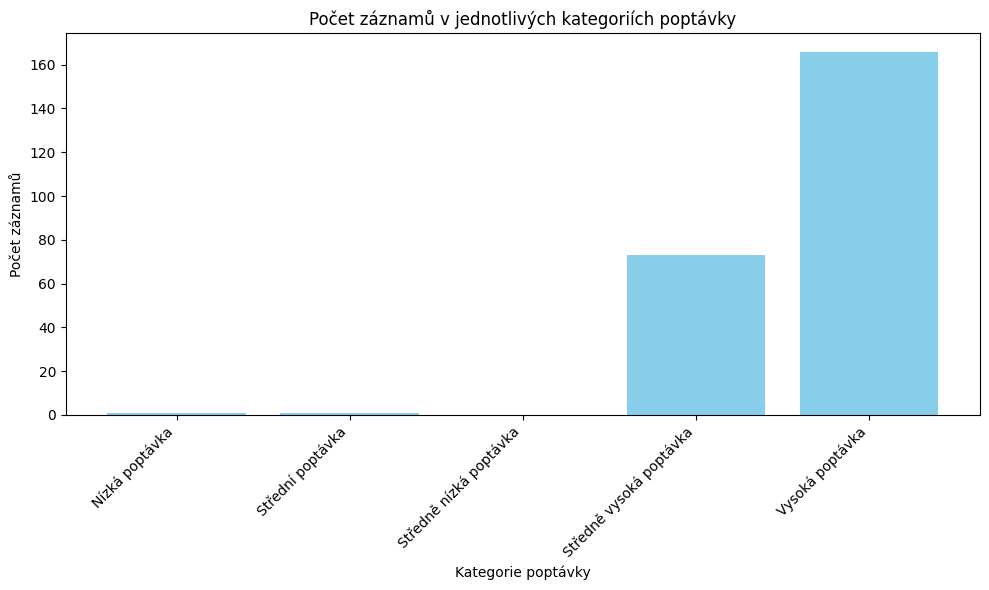

In [ ]:
import matplotlib.pyplot as plt

categories = ['Nízká poptávka', 'Střední poptávka', 'Středně nízká poptávka', 'Středně vysoká poptávka', 'Vysoká poptávka']
values = [1, 1, 0, 73, 166]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Kategorie poptávky')
plt.ylabel('Počet záznamů')
plt.title('Počet záznamů v jednotlivých kategoriích poptávky')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
